In [33]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
import imghdr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

#print(os.listdir(data_dir))
#print(os.listdir(os.path.join(data_dir, 'HappyPeople')))

In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            ima = cv2.imread(image_path)
            imagetype = imghdr.what(image_path)
            if imagetype not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 185 files belonging to 2 classes.


In [7]:
# Data scaling
data = data.map(lambda x, y: (x/255, y))

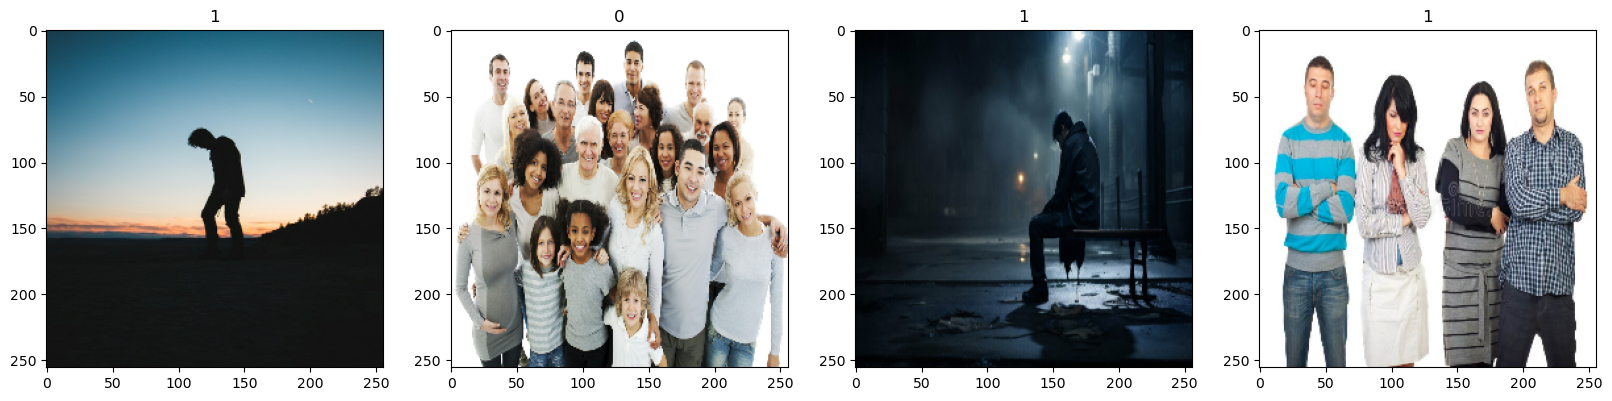

In [8]:
# x: images and y: labels
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

# Image visualization
fig, ax = plt.subplots(1, 4, figsize= (20, 20))
for i, img in enumerate(batch[0][:4]):
    ax[i].imshow(img)
    ax[i].set_title(batch[1][i])

In [9]:
# Data consists of 6 batches
len(data)

6

In [10]:
# Splitting Data
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1) + 1 # Post-training

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [12]:
model = Sequential([])

In [13]:
# Adding Layers
# Adding convolutional layer with 16 filters, size: 3x3 and increment 1 by 1.
# Relu: specific function that converts any negative value to 0 and preserves positive values.
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
# Getting maximum value from 2 values
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

#Condensing channel values formed by filters to 1 dimensional value
model.add(Flatten())

# 256 Neurons
model.add(Dense(256, activation='relu'))
#Single output
#Sigmoid: specific function mapped between 0 and 1
model.add(Dense(1, activation='sigmoid'))

In [14]:
# Adam: optimizer
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [16]:
logdir='logs'

In [17]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [18]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 3s 494ms/step - loss: 1.5170 - accuracy: 0.5000 - val_loss: 1.3538 - val_accuracy: 0.4688
Epoch 2/20
4/4 [==============================] - 2s 466ms/step - loss: 1.0177 - accuracy: 0.4922 - val_loss: 0.5900 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 2s 462ms/step - loss: 0.5927 - accuracy: 0.6641 - val_loss: 0.5727 - val_accuracy: 0.8125
Epoch 4/20
4/4 [==============================] - 2s 470ms/step - loss: 0.5455 - accuracy: 0.7500 - val_loss: 0.4791 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 2s 441ms/step - loss: 0.4341 - accuracy: 0.8984 - val_loss: 0.5717 - val_accuracy: 0.6562
Epoch 6/20
4/4 [==============================] - 2s 444ms/step - loss: 0.3535 - accuracy: 0.8516 - val_loss: 0.4403 - val_accuracy: 0.7500
Epoch 7/20
4/4 [==============================] - 2s 461ms/step - loss: 0.2818 - accuracy: 0.8984 - val_loss: 0.2635 - val_accuracy: 0.8750
Epoch 8/20
4/4 [====

In [19]:
# Historical info
history.history

{'loss': [1.5170363187789917,
  1.0176922082901,
  0.5926664471626282,
  0.545511782169342,
  0.43414512276649475,
  0.3535272777080536,
  0.28182774782180786,
  0.22454772889614105,
  0.15188005566596985,
  0.1281329244375229,
  0.11326693743467331,
  0.062467075884342194,
  0.05790538713335991,
  0.06358679383993149,
  0.06277307122945786,
  0.07221449911594391,
  0.05094511806964874,
  0.029095258563756943,
  0.013718272559344769,
  0.008779861032962799],
 'accuracy': [0.5,
  0.4921875,
  0.6640625,
  0.75,
  0.8984375,
  0.8515625,
  0.8984375,
  0.90625,
  0.9296875,
  0.9453125,
  0.984375,
  0.9921875,
  0.9921875,
  0.984375,
  0.984375,
  0.9765625,
  0.984375,
  0.9921875,
  1.0,
  1.0],
 'val_loss': [1.3537873029708862,
  0.5900344848632812,
  0.5727273225784302,
  0.4790981113910675,
  0.5717201828956604,
  0.44031763076782227,
  0.2634720802307129,
  0.13361702859401703,
  0.15491215884685516,
  0.03743169456720352,
  0.07260127365589142,
  0.022846141830086708,
  0.090439

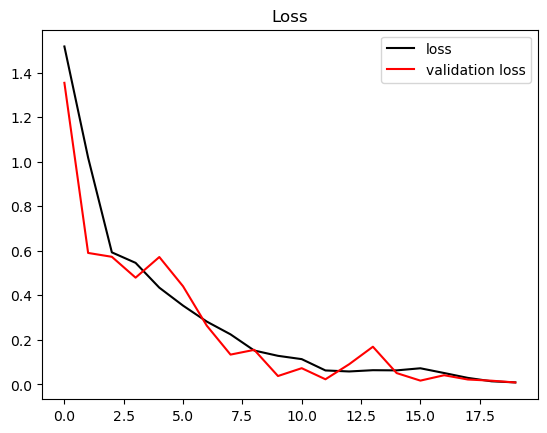

In [20]:
fig = plt.figure()
plt.plot(history.history['loss'], c='k', label='loss')
plt.plot(history.history['val_loss'], c='r', label='validation loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

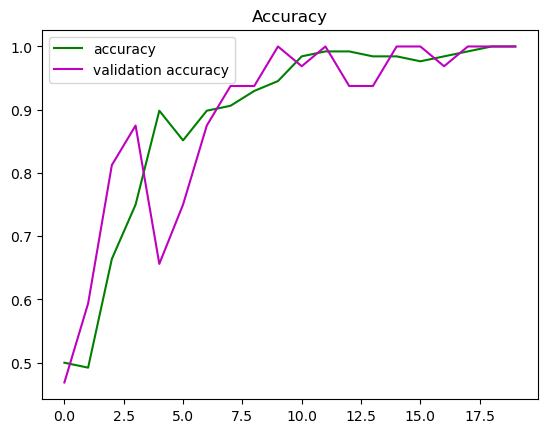

In [21]:
fig = plt.figure()
plt.plot(history.history['accuracy'], c='g', label='accuracy')
plt.plot(history.history['val_accuracy'], c='m', label='validation accuracy')
plt.title('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [22]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [23]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_hat = model.predict(X)
    precision.update_state(y, y_hat)
    recall.update_state(y, y_hat)
    accuracy.update_state(y, y_hat)

1/1 [==============================] - 0s 112ms/step


In [24]:
# Precision = TP / TP + FP
print(f'Presicion: {precision.result().numpy()}')
# Recall = TP / TP + FN
print(f'Recall: {recall.result().numpy()}')
# Accuracy = TP + TN / TP + TN + FP + FN
print(f'Accuracy: {accuracy.result().numpy()}')

Presicion: 1.0
Recall: 1.0
Accuracy: 1.0


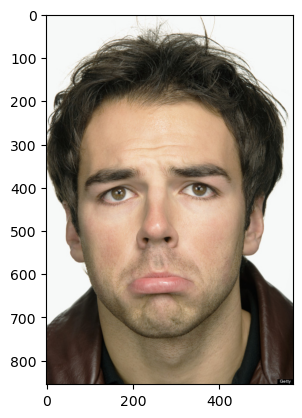

In [29]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

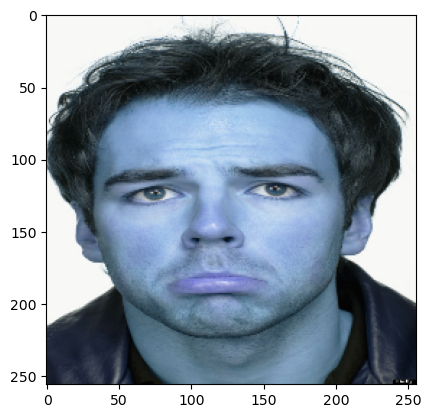

In [30]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [31]:
# y_hat is the prediction. 
# Algorithm predicts y_hat as 0.0000... which means happy.
y_hat = model.predict(np.expand_dims(resize/255, 0))
y_hat

1/1 [==============================] - 0s 28ms/step


array([[0.9633997]], dtype=float32)

In [32]:
if y_hat < 0.5:
    print('Predicted class is happy.')
else:
    print('Predicted class is sad.')

Predicted class is sad.


In [34]:
model.save(os.path.join('models', 'emotiondetectionmodel.h5'))

c:\Users\ataas\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
new_model = load_model(os.path.join('models', 'emotiondetectionmodel.h5'))

In [38]:
y_hatnew = model.predict(np.expand_dims(resize/255, 0))
y_hatnew

1/1 [==============================] - 0s 22ms/step


array([[0.9633997]], dtype=float32)

In [39]:
if y_hat < 0.5:
    print('Predicted class is happy.')
else:
    print('Predicted class is sad.')

Predicted class is sad.
